二次元マップで中心にエージェントを仮想的に配置した
10個のランダムな距離と中心からの角度を生成し、それらを点P群とした
それらの点P群は距離は0～500cm(5m)で、角度は0～360°の値をとっている
それらの点P群を二次元マップに書き込んで表示している
さらに線を追加して中心からの距離を可視化

SQLiteを使用して、データベースによる情報の保持テストを開始した。
まずはデータベースを作成するプログラムを組んだ。
その中でもSQLファイルが存在しない環境下のみ動作するように変更を行った。
さらに、環境に変化を加え、SQLで作成するテーブルは２つ作成するようにした
１つ目は、knowledgeテーブルである。このテーブルでは、選択的知識の各々の知識が持つ原点からの距離rや角度θを保持するものである。
２つ目は、euclidean_distanceテーブルである。euclidean_distanceテーブルとは、知識間の活性化の値を保持するものであり、knowledgeテーブルに変更を加えた場合動作させる必要がある。
３つ目は、activity_valueテーブルである。activity_valueテーブルとは、全知識の活性値を保持するテーブルである。処理が回るたびに忘却の処理を施す必要がある。活性化などで数値を変化させていくテーブルはこのテーブルである。

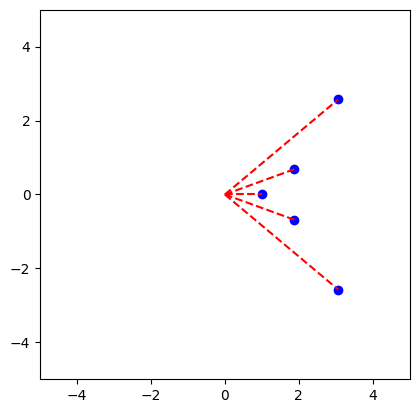

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points():
    points = [
        (320, 4),
        (340, 2),
        (0, 1),
        (20, 2),
        (40, 4)
    ]
    converted_points = []
    for angle, distance in points:
        x = distance * np.cos(np.deg2rad(angle))
        y = distance * np.sin(np.deg2rad(angle))
        converted_points.append((x, y))
    return converted_points

def plot_points_with_lines(points):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # ポイントをプロット
    ax.scatter(*zip(*points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0s

    # 点と中心を線で結ぶ
    for point in points:
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')

    plt.show()

points = generate_points()
plot_points_with_lines(points)
